<a href="https://colab.research.google.com/github/mounsifelatouch/code/blob/master/python/CDD/PFE/CDD_ML_Part_5_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Mounsif EL ATOUCH

In this Jupyter notebook, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [5]:
! wget https://raw.githubusercontent.com/mounsifelatouch/data/master/CDD/bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-05-02 21:23:54--  https://raw.githubusercontent.com/mounsifelatouch/data/master/CDD/bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463425 (453K) [text/plain]
Saving to: ‘bioactivity_data_3class_pIC50_pubchem_fp.csv’

bioactivity_data_3c 100%[===================>] 452.56K  --.-KB/s    in 0.04s   

2023-05-02 21:23:54 (12.2 MB/s) - ‘bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [463425/463425]



In [6]:
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [7]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [8]:
# Examine X dimension
X.shape

(254, 881)

In [9]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(254, 129)

In [10]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [13]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:14<00:00,  2.83it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:14<00:00,  2.86it/s]


In [14]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.43,0.79,0.41,0.05
ExtraTreeRegressor,0.43,0.79,0.41,0.05
ExtraTreesRegressor,0.43,0.79,0.41,0.35
GaussianProcessRegressor,0.43,0.79,0.41,0.07
XGBRegressor,0.43,0.79,0.41,0.24
RandomForestRegressor,0.31,0.75,0.45,0.36
BaggingRegressor,0.24,0.72,0.47,0.05
GradientBoostingRegressor,0.17,0.70,0.49,0.22
HistGradientBoostingRegressor,-0.00,0.64,0.54,0.22


In [15]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,86695611669344970091697935918945405830157510376...,-1369790664375650378375660379767239755340635726...,84863015992631504381529708036096.00,0.10
LinearRegression,31811569166397019632173056.00,-50262279282907285091778560.00,5140583889539.49,0.04
TransformedTargetRegressor,31811569166397019632173056.00,-50262279282907285091778560.00,5140583889539.49,0.02
RANSACRegressor,132259642373352573632512.00,-208970234949897040166912.00,331461870497.74,1.06
KernelRidge,24.30,-35.81,4.40,0.02
GaussianProcessRegressor,8.59,-11.00,2.51,0.03
QuantileRegressor,1.67,-0.05,0.74,0.84
DummyRegressor,1.64,-0.01,0.73,0.02
ElasticNet,1.64,-0.01,0.73,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

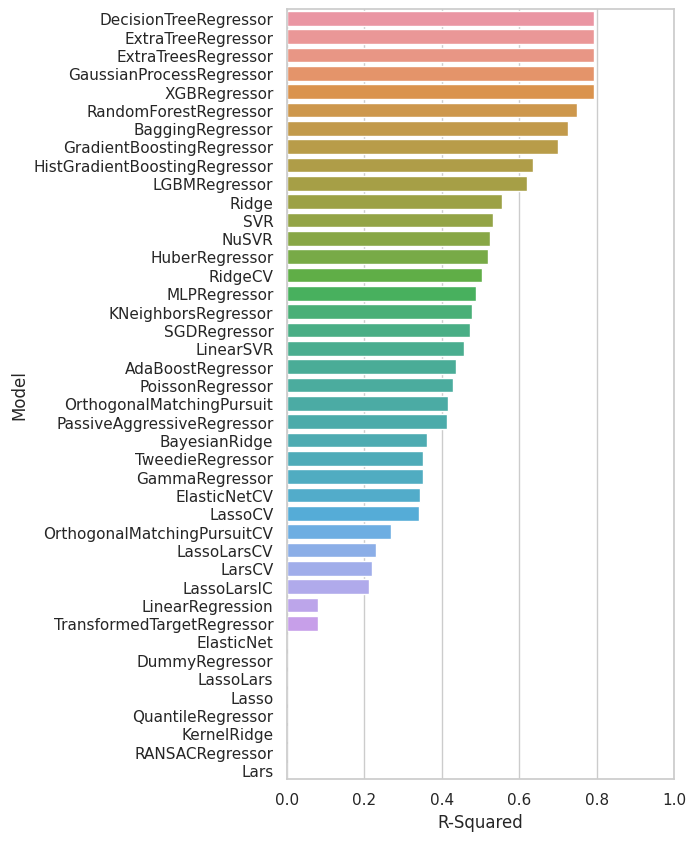

In [16]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

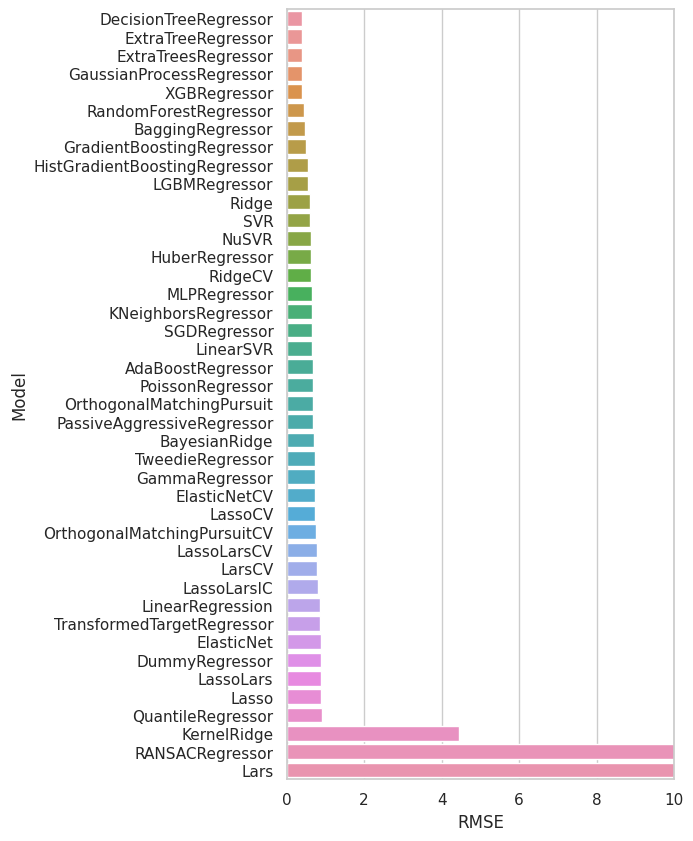

In [17]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

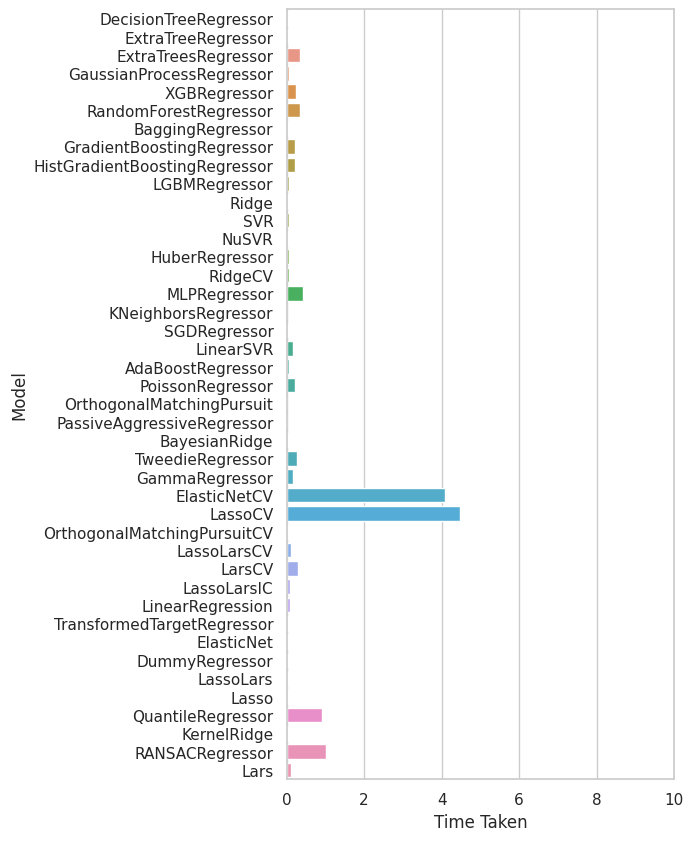

In [18]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))